Number of clusters: 2


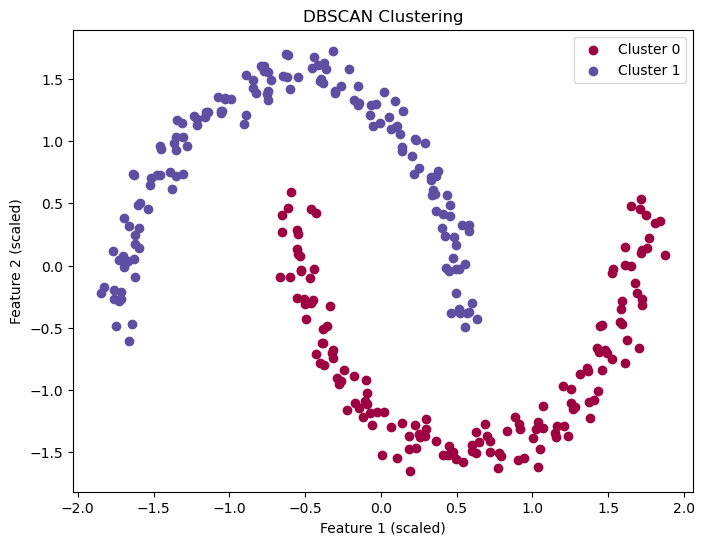

In [2]:
#DBSCAN Clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
X, y = make_moons(n_samples=300, noise=0.05)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


db = DBSCAN(eps=0.3, min_samples=5)  
db.fit(X_scaled)


labels = db.labels_


n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")


unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for label, col in zip(unique_labels, colors):
    if label == -1:
        
        col = [0, 0, 0, 1]

    mask = (labels == label)
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], c=[col], label=f'Cluster {label}' if label != -1 else 'Noise')

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()
